# Interruption Generator

Como tenemos una señal ya en archivos de Python, solo vamos a necesitar instalar dos librerías.
- *Os* para trabajar entre carpetas
- *Numpy* para operar las señales.
- *Matplotlib* para graficar las señales al final

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

En este script, solo tenemos una sola función "swell_generator".
- Primero hacemos una iteración de todos los archivos de la carpeta que se generó en el script "Signal_Extractor.ipynb".
- Si la ruta es correcta, debería encontrae el archivo, una vez que se encuentra el archivo, para operar se manera más sencilla, se trabajan con señales normalizadas. En este caso se usará la normalizada por el RMS.
- Después simplemente se define el factor de amplitud de la señal, como es un swell, tendrá que ser mayor que la señal nominal en un período de tiempo, los valores están definidos en la norma IEEE 1159.
- ![](https://figures.semanticscholar.org/308ec64d75779240f7fcdcdb8a7787098c605edd/1-TableI-1.png)

- Se elimina el print del final para no generar los 3600 datos en pantalla.
- Respecto a los límites, para poder trabajar dentro de la normal, tenemos que tener un rango de amplificación de entre 0.5 ciclos (0.01 segundo o 100 muestras) a 30 ciclos (0.6 s o 6000 muestras) y los factores de amplitud son de 0.01 0.1.

In [2]:
# Obtener el directorio actual del script
directorio_actual = os.path.dirname(os.path.abspath('disturbance_creator'))
directorio_destino = os.path.join(directorio_actual, 'interruption_signals')

# Creamos todas las carpetas antes de iniciar el bucle
os.makedirs(directorio_destino, exist_ok=True)
os.makedirs(os.path.join('interruption_signals', 'train'), exist_ok=True)
os.makedirs(os.path.join('interruption_signals', 'test'), exist_ok=True)
os.makedirs(os.path.join('interruption_signals', 'val'), exist_ok=True)

def interruption_generator():
    total_signals = 3600
    num_iterations = 3  # Triplicar las señales
    signals_per_iteration = total_signals
    total_generated = num_iterations * signals_per_iteration

    for iteration in range(3):
        for i in range(3601):
            nombre_archivo = f"or_s_{i}.npy"
            ruta_archivo = os.path.join(directorio_actual, 'original_signal', nombre_archivo)

            if os.path.exists(ruta_archivo):
                # Cargar los datos desde el archivo .npy
                data = np.load(ruta_archivo)
                # Normalizar la señal al rango para una potencia unitaria RMS
                signal_original = data / np.sqrt(np.mean(data**2))

                # Parámetros de la amplificación aleatoria
                longitud_signal = len(signal_original)
                duracion_amplificacion_min = 100  # en muestras
                duracion_amplificacion_max = 6000  # en muestras
                factor_amplitud_min = 0.01
                factor_amplitud_max = 0.1

                # Generar una duración aleatoria de la reducción de amplitud
                duracion_amplificacion = np.random.randint(duracion_amplificacion_min, duracion_amplificacion_max)

                # Generar la posición aleatoria para la reducción de amplitud
                inicio_amplificacion = np.random.randint(0, longitud_signal - duracion_amplificacion)

                # Generar el factor de amplificación aleatorio
                factor_amplitud = np.random.uniform(factor_amplitud_min, factor_amplitud_max)

                # Aplicar la amplificación en la parte aleatoria de la señal original
                signal_amplificada = np.copy(signal_original)
                signal_amplificada[inicio_amplificacion:(inicio_amplificacion + duracion_amplificacion)] *= factor_amplitud

                # Determinar la carpeta de destino
                index_global = iteration * signals_per_iteration + i
                if index_global < 0.7 * total_generated:
                    directorio_destino_final = os.path.join(directorio_destino, 'train')
                elif index_global < 0.85 * total_generated:
                    directorio_destino_final = os.path.join(directorio_destino, 'test')
                else:
                    directorio_destino_final = os.path.join(directorio_destino, 'val')

                # Guardar la señal amplificada en un nuevo archivo
                nombre_archivo_nuevo = f"int_s_{index_global}.npy"
                ruta_archivo_nuevo = os.path.join(directorio_destino_final, nombre_archivo_nuevo)
                np.save(ruta_archivo_nuevo, signal_amplificada)

interruption_generator()

Al igual que en *'Signal_Extractor.ipynb'* se genera aleatoriamente una represetación de una señal para saber si ha funcionado.

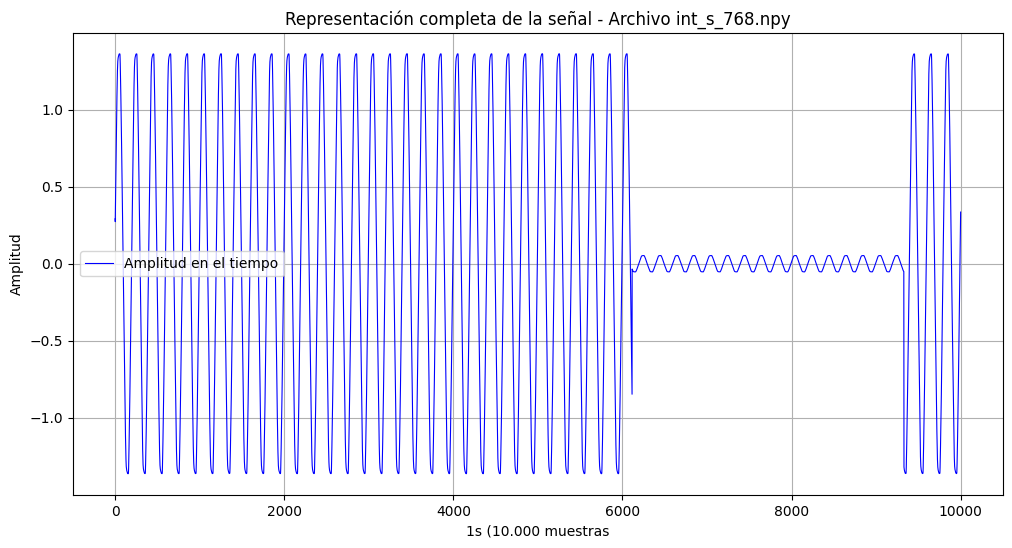

In [3]:
# Generar un número aleatorio entre 1 y 3600 para seleccionar el archivo
import random

archivo_numero = random.randint(1, 3600)
archivo_path = os.path.join(os.getcwd(), 'interruption_signals','train', f'int_s_{archivo_numero}.npy')

# Cargar el archivo completo
signal_data = np.load(archivo_path)

# Graficar todos los datos de la señal
plt.figure(figsize=(12, 6))
plt.plot(signal_data, color='b', linestyle='-', linewidth=0.8, label='Amplitud en el tiempo')
plt.title(f"Representación completa de la señal - Archivo int_s_{archivo_numero}.npy")
plt.xlabel("1s (10.000 muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()